In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [97]:
df = pd.read_csv("/Users/furkanozdal/Downloads/UNZIP_FOR_NOTEBOOKS_FINAL/DATA/hearing_test.csv")

In [98]:
df.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             5000 non-null   float64
 1   physical_score  5000 non-null   float64
 2   test_result     5000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 117.3 KB


In [100]:
df.describe()

,age,physical_score,test_result
count,5000.000000,5000.000000,5000.000000
mean,51.609000,32.760260,0.600000
std,11.287001,8.169802,0.489947
min,18.000000,-0.000000,0.000000
25%,43.000000,26.700000,0.000000
50%,51.000000,35.300000,1.000000
75%,60.000000,38.900000,1.000000
max,90.000000,50.000000,1.000000


In [101]:
df["test_result"].value_counts()

test_result
1    3000
0    2000
Name: count, dtype: int64

<Axes: xlabel='test_result', ylabel='count'>

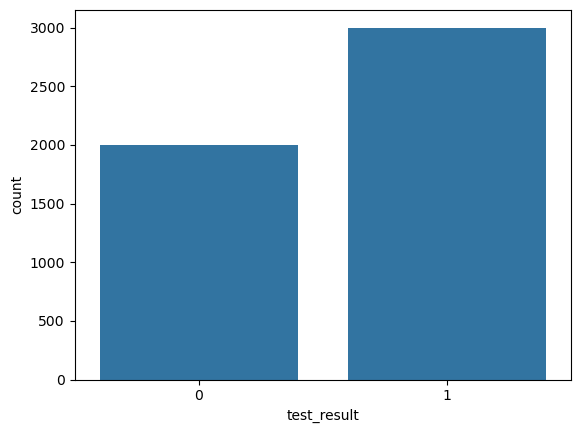

In [102]:
sns.countplot(x="test_result",data=df)

<Axes: xlabel='test_result', ylabel='physical_score'>

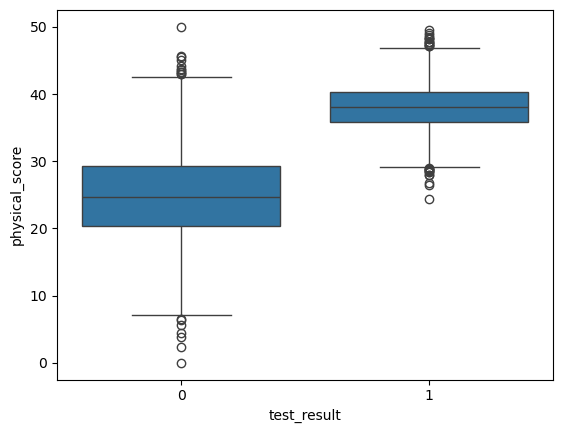

In [103]:
sns.boxplot(x="test_result",y="physical_score",data=df)

<Axes: xlabel='age', ylabel='physical_score'>

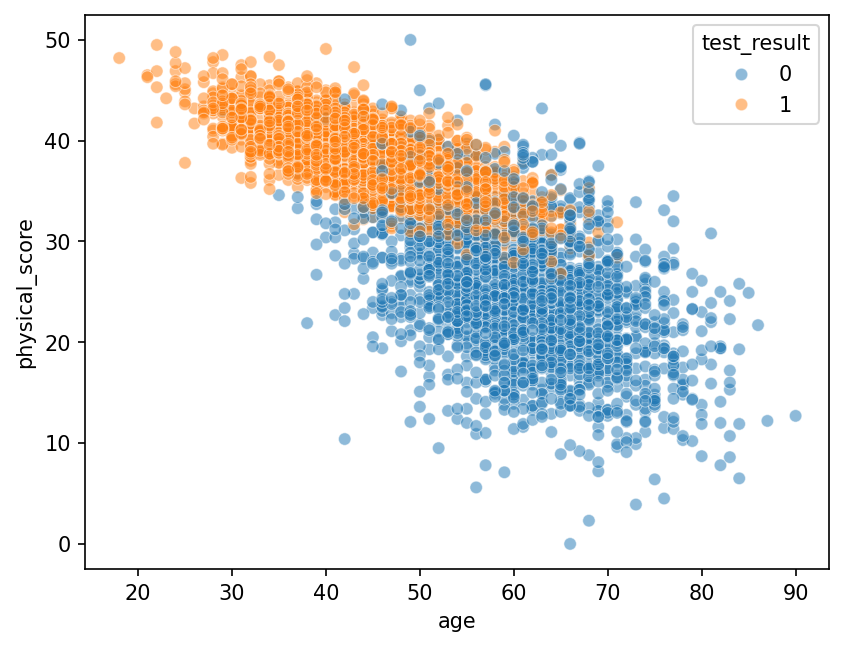

In [104]:
plt.figure(dpi=150)
sns.scatterplot(x="age",data=df,y="physical_score",hue="test_result",alpha=0.5)


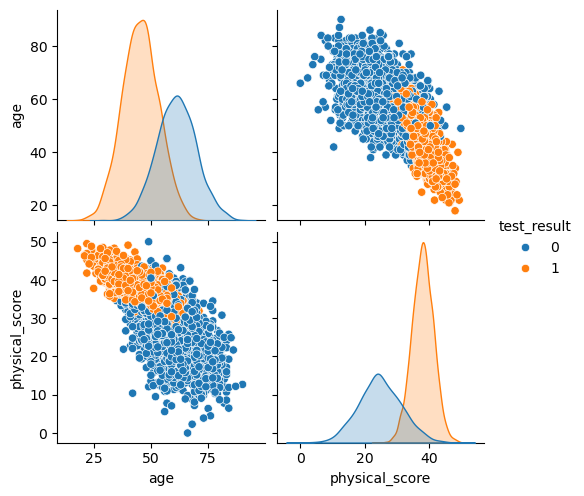

In [105]:
sns.pairplot(hue="test_result",data=df)

<Axes: >

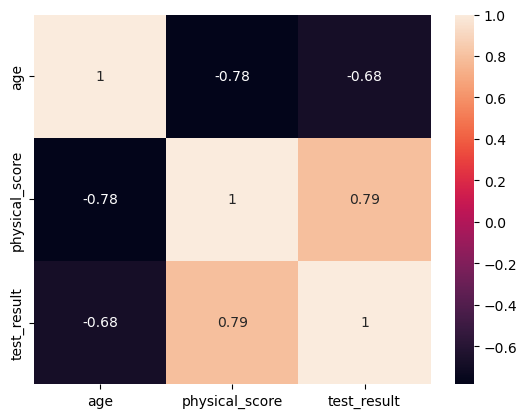

In [106]:
sns.heatmap(df.corr(),annot=True)

<Axes: xlabel='physical_score', ylabel='test_result'>

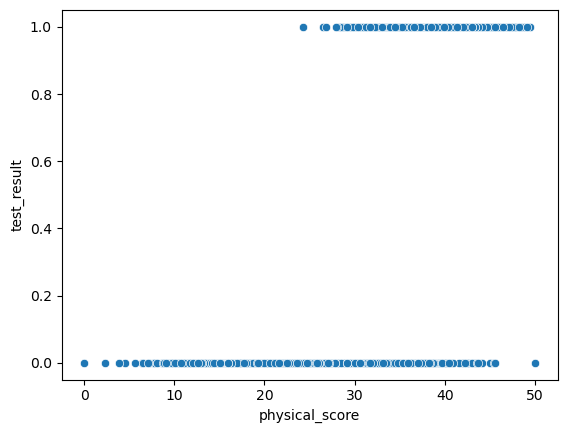

In [107]:
sns.scatterplot(y="test_result",x="physical_score",data=df)

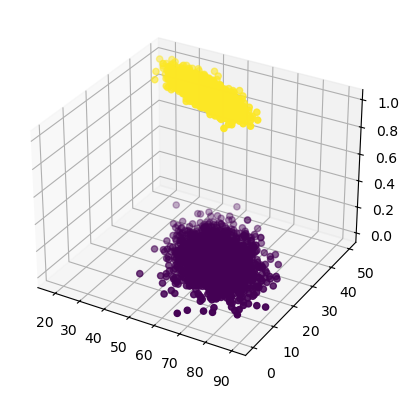

In [108]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(df["age"], df["physical_score"], df["test_result"],c=df["test_result"])

In [109]:
X=df.drop("test_result",axis=1)
y = df["test_result"]

In [110]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [112]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [113]:
from sklearn.linear_model import LogisticRegression

In [114]:
log_model = LogisticRegression()

In [115]:
log_model.fit(X_train,y_train)

LogisticRegression()

In [116]:
log_model.coef_

array([[-0.95017725,  3.46148946]])

In [117]:
y_pred = log_model.predict(X_test)

In [118]:
y_pred

array([1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,

In [119]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [120]:
accuracy_score(y_test,y_pred)

0.93

In [121]:
c_matrix = confusion_matrix(y_test,y_pred)

In [122]:
c_matrix

array([[172,  21],
       [ 14, 293]])

In [123]:
from sklearn.metrics import ConfusionMatrixDisplay

In [124]:
c_matrix = c_matrix / 500

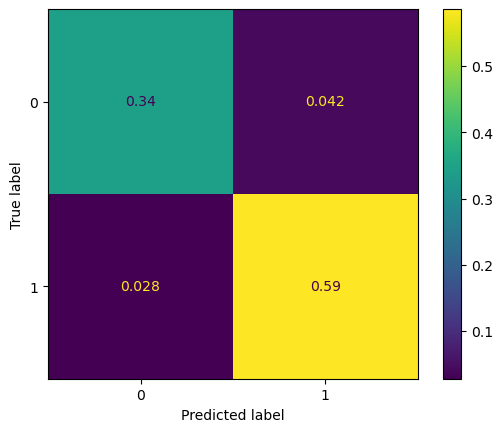

In [125]:
disp = ConfusionMatrixDisplay(c_matrix)
disp.plot()

In [126]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.89      0.91       193
           1       0.93      0.95      0.94       307

    accuracy                           0.93       500
   macro avg       0.93      0.92      0.93       500
weighted avg       0.93      0.93      0.93       500



In [127]:
from sklearn.metrics import RocCurveDisplay

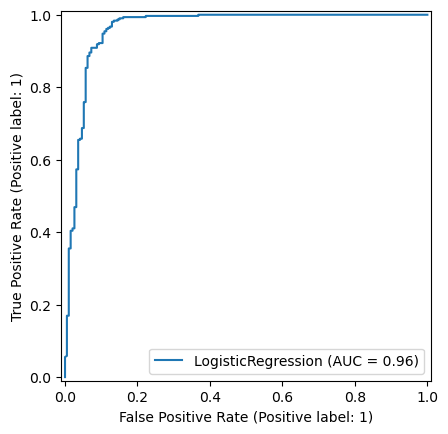

In [128]:
RocCurveDisplay.from_estimator(log_model, X_test, y_test) ##?????????

In [129]:
df = pd.read_csv("/Users/furkanozdal/Downloads/UNZIP_FOR_NOTEBOOKS_FINAL/DATA/iris.csv")

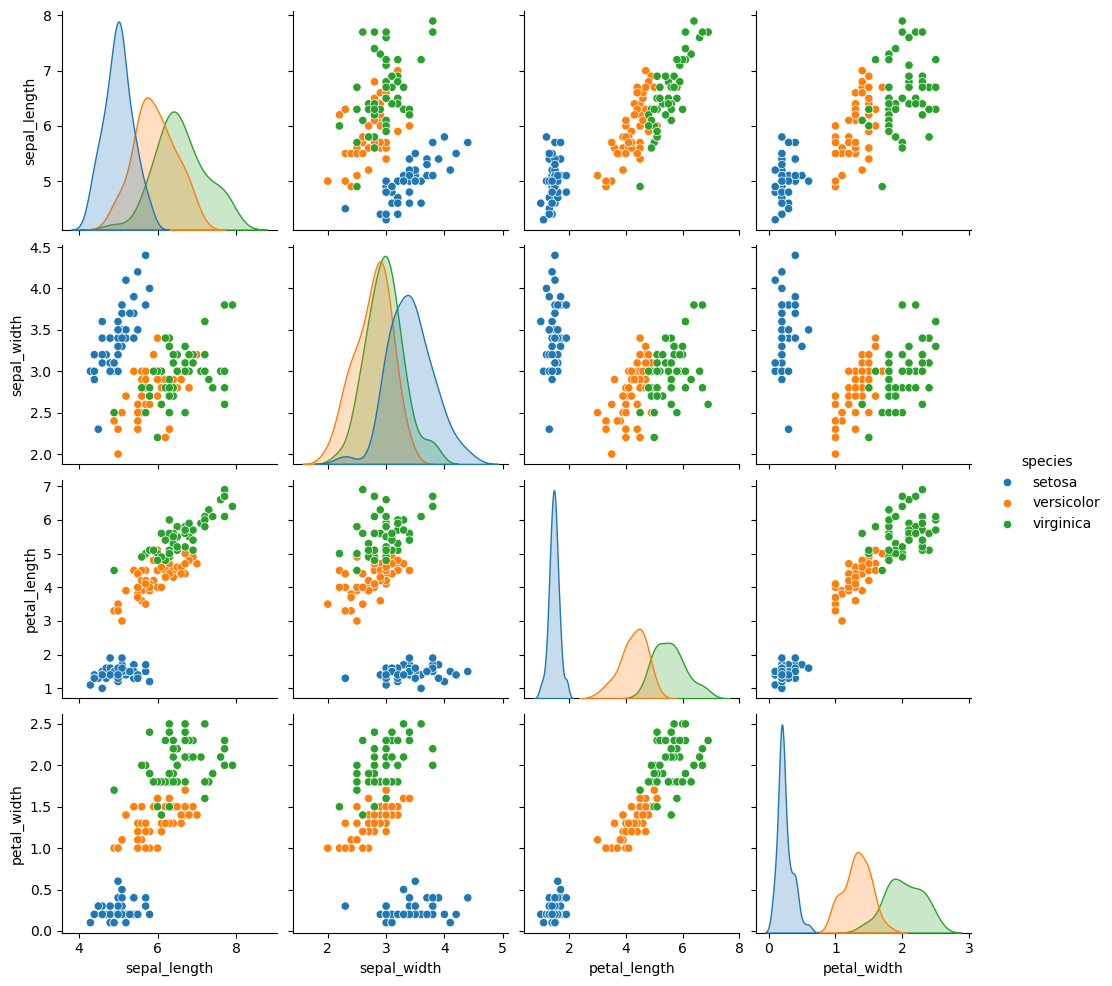

In [130]:
sns.pairplot(df,hue="species")

In [131]:
from sklearn.model_selection import GridSearchCV

In [132]:
n_scaler = StandardScaler()

In [133]:
y = df["species"]
X = df.drop("species",axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [134]:
X_train = n_scaler.fit_transform(X_train)
X_test = n_scaler.transform(X_test)

In [135]:
log_model = LogisticRegression(solver="saga",multi_class="ovr",max_iter=5000)

In [136]:
penalty = ["l1","l2","elasticnet"]
l1_ratio = np.linspace(0,1,20)
C = np.logspace(0,10,20)
param_grid = {"penalty":penalty, "l1_ratio":l1_ratio,"C":C}

In [137]:
grid_model = GridSearchCV(log_model,param_grid=param_grid)

In [138]:
grid_model.fit(X_train,y_train)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-

GridSearchCV(estimator=LogisticRegression(max_iter=5000, multi_class='ovr',
                                          solver='saga'),
             param_grid={'C': array([1.00000000e+00, 3.35981829e+00, 1.12883789e+01, 3.79269019e+01,
       1.27427499e+02, 4.28133240e+02, 1.43844989e+03, 4.83293024e+03,
       1.62377674e+04, 5.45559478e+04, 1.83298071e+05, 6.15848211e+05,
       2.06913808e+06, 6.95192796e+06, 2.33572147e+07, 7.84759970e+07,
       2.63665090e+08, 8.85866790e+08, 2.97635144e+09, 1.00000000e+10]),
                         'l1_ratio': array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
       0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
       0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
       0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ]),
                         'penalty': ['l1', 'l2', 'elasticnet']})

In [139]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [142]:
y_pred = grid_model.predict(X_test)

In [145]:
accuracy_score(y_test,y_pred)

0.9736842105263158

In [147]:
c_matrix = confusion_matrix(y_test,y_pred)

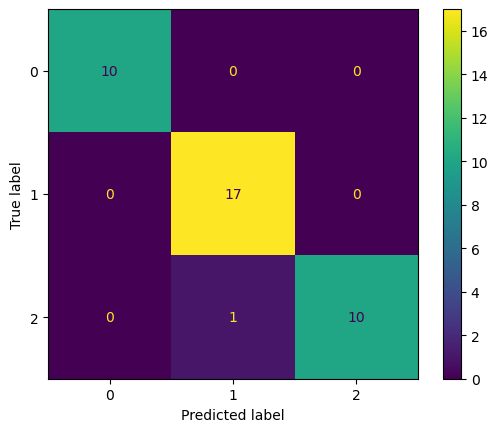

In [148]:
disp = ConfusionMatrixDisplay(c_matrix)
disp.plot()

In [149]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.94      1.00      0.97        17
   virginica       1.00      0.91      0.95        11

    accuracy                           0.97        38
   macro avg       0.98      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38

